# Introductory applied machine learning (INFR10069)

<div align="right"><font color="blue" size="5">Your Score was 109.0 out of a total of 151.0, or 72.2%</font></div>

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import KFold 
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

<div align="right"><font color="blue" size="4">7.0/8.0</font></div>

In [2]:
# (1) # Your Code goes here:

# load the dataset train_auto_numeric.csv into auto_numeric
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path)
auto_numeric.info()
auto_numeric.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***

There are 159 rows and 16 columns in this table.Total of 159 samples are contained in this dataset. There are 15 attributes related to the price of the automobile. All the datatype in this dataframe is float64.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

<div align="right"><font color="blue" size="4">15.0/18.0</font></div>

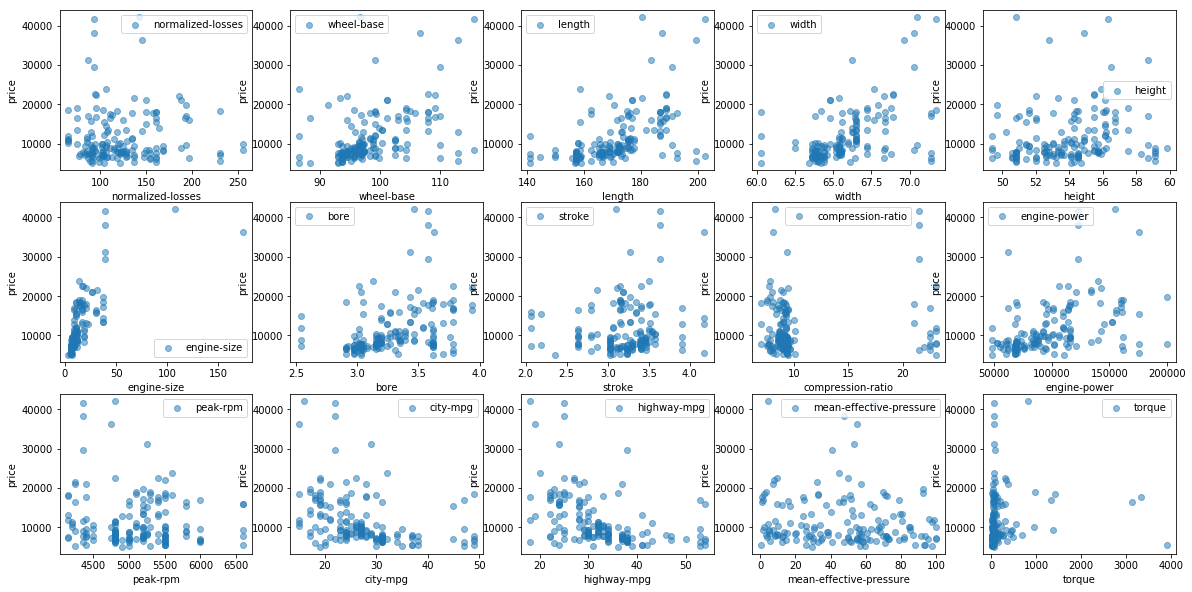

In [3]:
# (1) # Your Code goes here:

# creat a list to store Correlation Coefficients
c_list = list()
# calculate the Correlation Coefficients of each attribute wrt the price
f = plt.figure(figsize=(20,10))
for i in range (15) :
    attri = auto_numeric[auto_numeric.columns[i]]
    x_name = auto_numeric.columns[i]
    price = auto_numeric[auto_numeric.columns[15]]
    # Visualise the distribution of each attribute with price using scatter plot 
    plt.subplot(3, 5, i+1)
    plt.scatter(attri, price, alpha = 0.5, label = auto_numeric.columns[i])
    plt.ylabel('price')
    plt.xlabel(auto_numeric.columns[i])
    plt.legend()
    # calculate Correlation Coefficients
    CC = np.corrcoef(attri, price)[0,1]
    # add values to the list
    c_list.append([auto_numeric.columns[i], CC])

plt.show()


In [4]:
# continue with question (1)
# the plots took too many spaces so I print the Correlation Coefficients here
print("The Correlation Coefficients are listed as below:\n", c_list)

The Correlation Coefficients are listed as below:
 [['normalized-losses', 0.015367647423658213], ['wheel-base', 0.42351059515038575], ['length', 0.5128830452653906], ['width', 0.5243255521274495], ['height', 0.13956255898680378], ['engine-size', 0.7151245901914791], ['bore', 0.3652072892128543], ['stroke', 0.12783403193265097], ['compression-ratio', 0.12568322167466553], ['engine-power', 0.44396859146316336], ['peak-rpm', -0.09934529106318549], ['city-mpg', -0.3567895006724703], ['highway-mpg', -0.4384674317144328], ['mean-effective-pressure', -0.10486005065048885], ['torque', 0.1014345813072746]]


<div align="right"><font color="blue" size="4">6.0</font></div>

(2) ***Your answer goes here:***

Here we choose the attributes with the highest absolute value.

engine-size 0.7151

width 0.5243

length 0.5128

engine-power 0.4439

highway-mpg 0.4385


The attribute "highway-mpg" has a negative effect on the "price" since its correlation coefficient is negative.

<div align="right"><font color="blue" size="4">3.0</font></div>

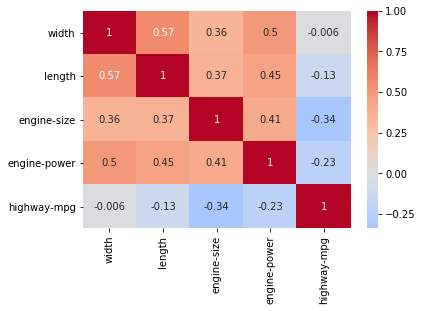

In [5]:
# (3) # Your Code goes here:

# plot a heatmap showing the correlation between each one among the five attributes we selected
att_5 = auto_numeric[['width', 'length', 'engine-size', 'engine-power', 'highway-mpg']]
sns.heatmap(att_5.corr(),annot=True,cmap='coolwarm',center=0)

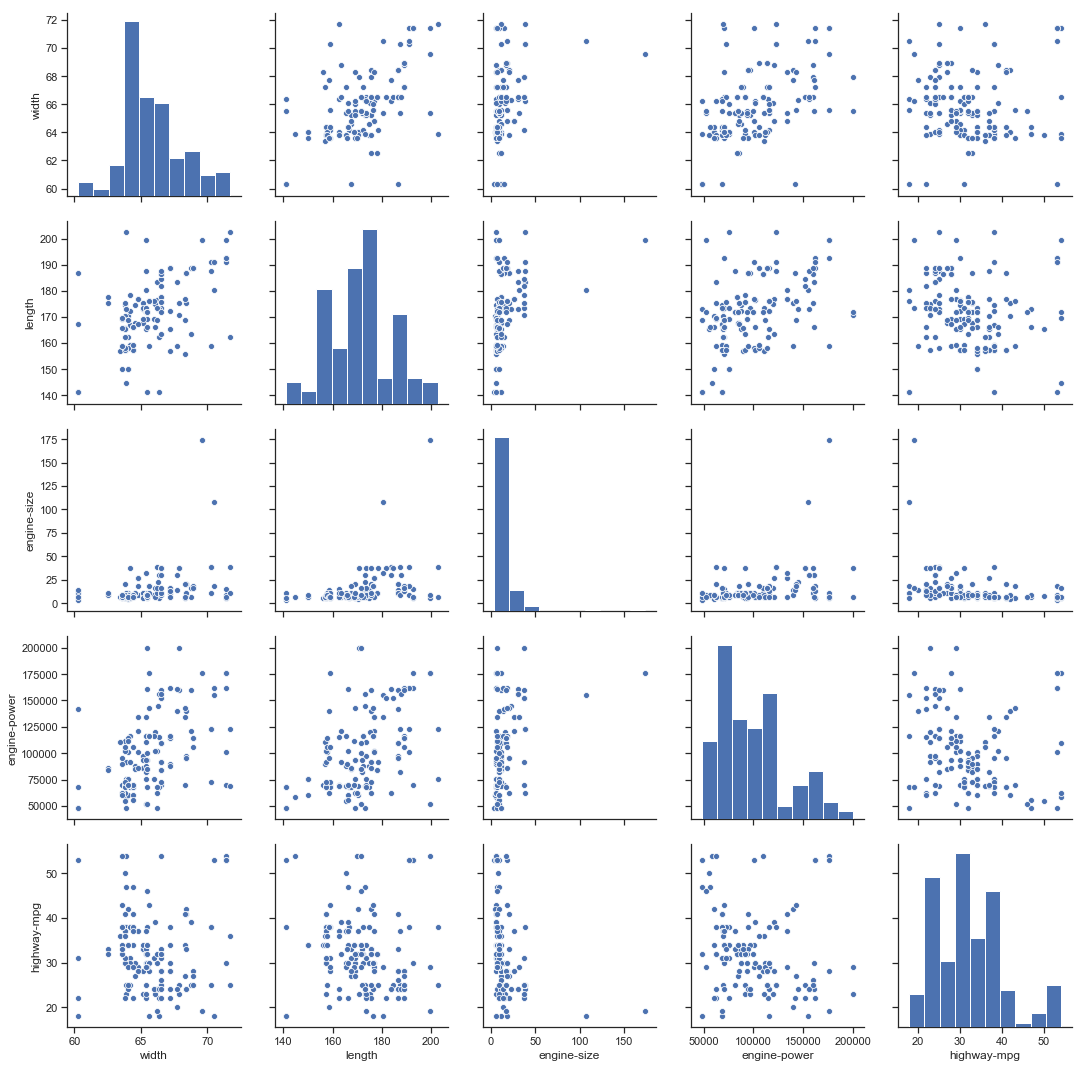

In [6]:
# continue with question (3)
# Or we can use a pairplot to see the relationship between each one of the five attributes
sns.set(style="ticks", color_codes=True)
sns.pairplot(auto_numeric, vars=['width', 'length', 'engine-size', 'engine-power', 'highway-mpg'], height = 3)

<div align="right"><font color="blue" size="4">2.0</font></div>

(4) #STARTHIDE#

[2 Marks] Identify at least 2 pairs which appear correlated. Some examples are: 
  * `length` and `wheel base`
  * `width` and `wheel-base`
  * `engine-power` and `length`
  
  
  * "width" and "length"
  * "width" and "engine power"
  

<div align="right"><font color="blue" size="4">2.0</font></div>

(5) ***Your answer goes here:***

We could remove "normalized-losses" and "peak-rpm". Both of them have very low correlation coefficient regarding the "price" which are 0.015 and -0.099 respectively.

<div align="right"><font color="blue" size="4">2.0</font></div>

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

<div align="right"><font color="blue" size="4">2.0/5.0</font></div>

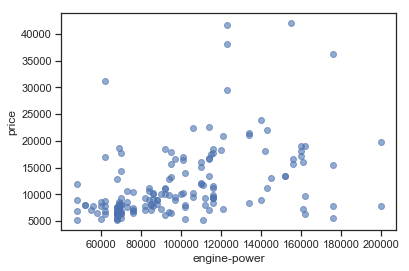

In [7]:
# (1) # Your Code goes here:
plt.scatter(auto_numeric['engine-power'], auto_numeric['price'], alpha = 0.6)
plt.ylabel('price')
plt.xlabel('engine-power')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***

From the plot, the data points seem biased towards small x and y, so it is not accurate to use "engine-power" to predict "price".

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

<div align="right"><font color="blue" size="4">3.0/8.0</font></div>

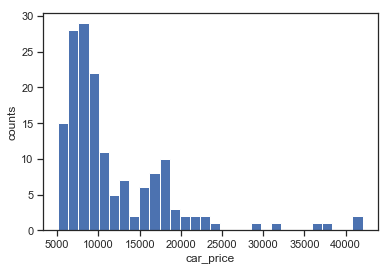

In [8]:
# (1) # Your Code goes here:
sns.set_style('ticks')
plt.hist(auto_numeric['price'], bins=30)
plt.xlabel('car_price')
plt.ylabel('counts')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***

The data points in "price" are dense in one area so the data is unbalanced, more focued on the cheap cars. In this case, it is not suitable to apply linear regression. If we, for example, delet high-price car and then apply linear regression on the dataset, the model would be more accurate to predict cheap cars.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

In [9]:
# Your Code goes here:

# convert X into an array
X = auto_numeric['engine-power'].values
X = X.reshape(-1,1)
y = auto_numeric['price'].values
# split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

<div align="right"><font color="blue" size="4">4.0/4.0</font></div>

In [10]:
# Your Code goes here:

# the baseline is the mean of 'price' (in cases with outliers, it may be a better idea to use median)
y_mean_train = np.mean(y_train)
print(y_mean_train)

11853.267716535433


<div align="right"><font color="blue" size="4">4.0</font></div>

<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

<div align="right"><font color="blue" size="4">3.0/7.0</font></div>

In [11]:
# (1) # Your Code goes here:

# train the linear regression model on the training set we splited
reg = linear_model.LinearRegression()
model = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
# report its parameters
print("The model coefficient is:" ,model.coef_[0])
print("The model intercept is :" ,model.intercept_)

The model coefficient is: 0.0898838874386661
The model intercept is : 2823.121891102828


<div align="right"><font color="blue" size="4">3.0</font></div>

(2) ***Your answer goes here:***

The model coefficient for attribute 'engine-power' is low which means this attribute does not have a big influnce on the output.

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

<div align="right"><font color="blue" size="4">7.0/9.0</font></div>

D:\software\miniconda\envs\py3iaml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


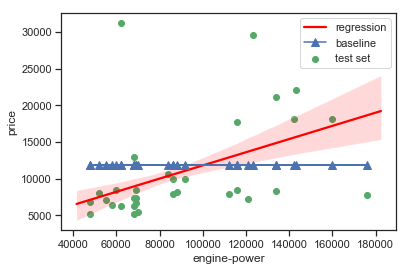

In [12]:

# test set data scatter plot
plt.scatter(X_test, y_test, c = 'g', marker='o', label = 'test set')
plt.xlabel('engine-power')
plt.ylabel('price')
# regression plot
sns.regplot(X_train, y_train, color = 'red', scatter = False, label = 'regression')
# baseline
y_mean = np.full((32, 1), y_mean_train)
plt.plot(X_test, y_mean, marker = '^', markersize=8, label = 'baseline')

plt.legend()
plt.show()

<div align="right"><font color="blue" size="4">7.0</font></div>

(2) ***Your answer goes here:***

The regression model is more accurate as it shows the trend of the dataset. The baseline model is just the mean of the 'price' which provides an overall understanding of the whole dataset.

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

<div align="right"><font color="blue" size="4">12.0/20.0</font></div>

D:\software\miniconda\envs\py3iaml\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\miniconda\envs\py3iaml\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


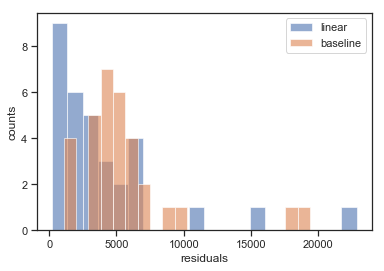

In [13]:
# (1) # Your Code goes here:

# calculate the difference between the ture label and the predict values and take the absolute value of the difference
resi_linear = np.absolute(y_pred - y_test)
resi_base = np.absolute(y_mean_train - y_test)

plt.hist(resi_linear, bins = 20, normed = False, alpha = 0.6, label = 'linear')
plt.hist(resi_base, bins = 20, normed = False, alpha = 0.6, label = 'baseline')
plt.xlabel('residuals')
plt.ylabel('counts')
plt.legend()
plt.show()


<div align="right"><font color="blue" size="4">5.0</font></div>

In [14]:
# (2) # Your Code goes here:

# linear model 
print("In the linear model:")
RMSE_linear = sqrt(mean_squared_error(y_test, y_pred))
print("The root mean square error is", RMSE_linear)
R2_linear = r2_score(y_test, y_pred)
print("The R^2 (coefficient of determination) regression score function is", R2_linear)

#baseline model
RMSE_base = sqrt(mean_squared_error(y_test, y_mean))
R2_base = r2_score(y_test, y_mean)
print("In the baseline model:")
print("The root mean square error is", RMSE_base)
print("The R^2 (coefficient of determination) regression score function is", R2_base)

In the linear model:
The root mean square error is 6153.70386613629
The R^2 (coefficient of determination) regression score function is 0.16852372539951466
In the baseline model:
The root mean square error is 6800.33149133527
The R^2 (coefficient of determination) regression score function is -0.015399260296584893


<div align="right"><font color="blue" size="4">4.0</font></div>

(3) ***Your answer goes here:***

From the histgram, we can see the linar model has a better performance than the baseline since the residuals are less. RMSE shows us the variation between the data, the smaller the better. Linear model also has a smaller RMSE than the baseline. R^2 score shows the accuracy of the model, the best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). The R^2 score is also better in the linear model case.

<div align="right"><font color="blue" size="4">3.0</font></div>

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



<div align="right"><font color="blue" size="4">7.0/9.0</font></div>

(1) ***Your answer goes here:***

Only one set of testing/training dataset is used to train and test the performance of the model. There are possibilities that this one training/testing set is not random enough which means they can not represent the whole dataset. In this case, the model could be overfitting. We are trying to avoid overfitting during our training.

<div align="right"><font color="blue" size="4">0.0</font></div>

In [15]:
# (2) # Your Code goes here:

# import KFold

cv = KFold(n_splits=5, random_state=0, shuffle=True)


<div align="right"><font color="blue" size="4">2.0</font></div>

In [16]:
# (3) # Your Code goes here:

y_cross_pred = cross_val_predict(reg, X, y, cv=cv)
RMSE_cross = sqrt(mean_squared_error(y, y_cross_pred))
R2_cross = r2_score(y, y_cross_pred)
print("In the cross validation model:")
print("The root mean square error is", RMSE_cross)
print("The R^2 (coefficient of determination) regression score function is", R2_cross)

In the cross validation model:
The root mean square error is 6114.452118615525
The R^2 (coefficient of determination) regression score function is 0.1730052709757075


<div align="right"><font color="blue" size="4">4.0</font></div>

(4) ***Your answer goes here:*** 

The R^2 (coefficient of determination) increased by 0.01 compared to the previous linear model. As we keep increasing the fold number, the R^2 score keepd raising. So we can see by using this cross validation model, we can improve the accuracy of the predicted results.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

<div align="right"><font color="blue" size="4">17.0/18.0</font></div>

In [17]:
# (1) # Your Code goes here:

# load dataset train_auto_base.csv into "auto_base"
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path)

# train the linear regression model reg on only data from 'engine-power' and 'price'
X_auto_base = auto_base['engine-power'].values
y_auto_base = auto_base['price'].values
X_auto_base = X_auto_base.reshape(-1,1)
# split X and y into training set and testing set
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_auto_base, y_auto_base, test_size=0.2, random_state = 0)

reg = linear_model.LinearRegression()
reg.fit(X_train_base, y_train_base)
y_test_base_pred = reg.predict(X_test_base)

# report the RMSE and R^2 score of this model
RMSE_auto_base = sqrt(mean_squared_error(y_test_base, y_test_base_pred))
R2_auto_base = r2_score(y_test_base, y_test_base_pred)
print("In the cross validation model:")
print("The root mean square error is", RMSE_auto_base)
print("The R^2 (coefficient of determination) regression score function is", R2_auto_base)


In the cross validation model:
The root mean square error is 6800.33149133527
The R^2 (coefficient of determination) regression score function is -0.015399260296584893


<div align="right"><font color="blue" size="4">6.0</font></div>

D:\software\miniconda\envs\py3iaml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


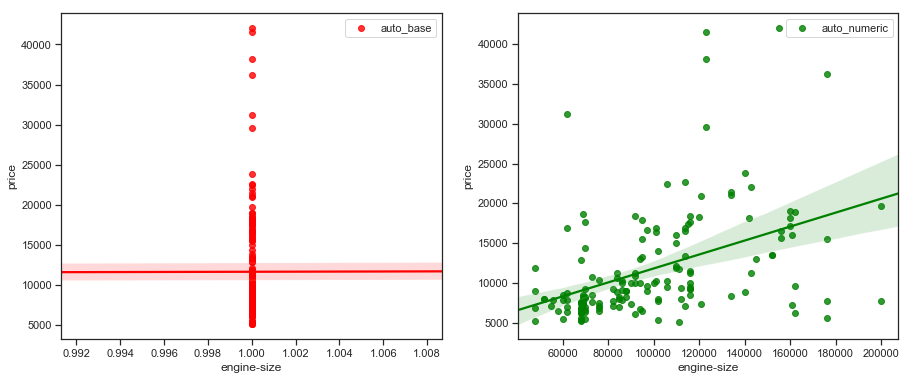

In [18]:
# (2) Show any working code here...
# Your Code goes here:
plt.figure(figsize=(15,6))
# plot the data point and regression line from auto_base
plt.subplot(1,2,1)
ax1 = sns.regplot(X_auto_base, y_auto_base, color = 'red', label = 'auto_base')
plt.xlabel('engine-size')
plt.ylabel('price')
plt.legend()
# plot the data point and regression line from auto_numeric
plt.subplot(1,2,2)
ax2 = sns.regplot(X, y, color = 'green', label = 'auto_numeric')
plt.xlabel('engine-size')
plt.ylabel('price')
plt.legend()

<div align="right"><font color="blue" size="4">8.0</font></div>

(2) - Final Conclusion(s)
***Your answer goes here:***

These two datasets are very different. In auto_base, all the data in engine-size are 1, so it is just a stright line with different y values. In auto_numeric, the engine-size and price shows a much more linear trend. So the previous model has a higher R^2 score which means better performance than this model using auto_base.

<div align="right"><font color="blue" size="4">3.0</font></div>

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

<div align="right"><font color="blue" size="4">6.0/6.0</font></div>

In [19]:
# (1) # Your Code goes here:

# train the linear model "lrg" using the whole auto_numeric data set
X_num = auto_numeric[auto_numeric.columns[:15]]
y_num = auto_numeric['price']

lrg = linear_model.LinearRegression()
lrg.fit(X_num, y_num)

# predict the results using cross validation
y_num_pred = cross_val_predict(lrg, X_num, y_num, cv=cv)
y_num_pred

# report the RMSE and R^2 score of this model
RMSE_num = sqrt(mean_squared_error(y_num, y_num_pred))
R2_num = r2_score(y_num, y_num_pred)
print("In the cross validation model:")
print("The root mean square error is", RMSE_num)
print("The R^2 (coefficient of determination) regression score function is", R2_num)


In the cross validation model:
The root mean square error is 4819.804642834616
The R^2 (coefficient of determination) regression score function is 0.48613798445730905


<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***

The performance of Multivariate Linear Regression model is much better than the previous linear one.

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` again (plot again below)
1. [Text] Why might this cause a problem for linear regression? 

<div align="right"><font color="blue" size="4">3.0/4.0</font></div>

Text(0.5,1,'Engine-size')

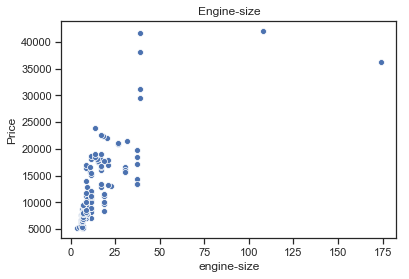

In [20]:
# (1) #STARTHIDE#
# [2 Marks] - Plot histogram with labels
ax = sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size')

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***

The data is unbalanced since majority of data points are concentrated on the "smaller engine-size" area. And from the scatter plot, they do not present a strong linear relationship.

<div align="right"><font color="blue" size="4">1.0</font></div>

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a LinearRegression Model and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

<div align="right"><font color="blue" size="4">9.0/10.0</font></div>

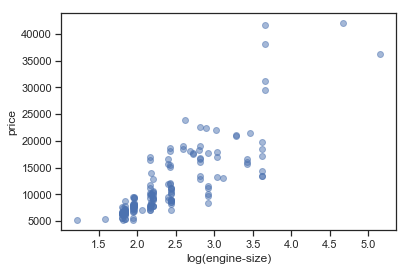

In [21]:
# (1) # Your Code goes here:

# Take the log of the data in attribute 'engine-size'
engine = np.log(auto_numeric['engine-size'])

# scatter plot of 'engine-size' wrt 'price'
plt.scatter(engine, auto_numeric['price'], alpha = 0.5)
plt.xlabel('log(engine-size)')
plt.ylabel('price')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

In [22]:
# (2) # Your Code goes here:

# replace the original data in 'engine-size' with the ones we have take log, call the new dataframe "auto_copy"
auto_copy = auto_numeric
auto_copy['engine-size']=engine
X_en = auto_copy[auto_copy.columns[:15]]
y_en = auto_copy['price']

# train the linear model "lrm" using X and y from auto_copy
lrm = linear_model.LinearRegression()
lrm.fit(X_en, y_en)

# predict the results using cross validation
y_en_pred = cross_val_predict(lrm, X_en, y_en, cv=cv)

# calculate the RMSE and R^2 score of this model
RMSE = sqrt(mean_squared_error(y_en, y_en_pred))
R2 = r2_score(y_en, y_en_pred)
print("The root mean square error is", RMSE)
print("The R^2 (coefficient of determination) regression score function is", R2)

The root mean square error is 3745.919597559892
The R^2 (coefficient of determination) regression score function is 0.6896122680289434


<div align="right"><font color="blue" size="4">3.0</font></div>

***Your answer goes here:***

The model has a much higher R^2 score compared to the previous one. This means by taking log of the data, the relationship between data and the output become more linear and the attribute 'engine-size' has a big influence on the final output.

<div align="right"><font color="blue" size="4">4.0</font></div>

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

<div align="right"><font color="blue" size="4">2.0/12.0</font></div>

(1) ***Your answer goes here:***

In linear regression, we can see if the attribute has a linear relationship with the 'price'. We can quantify this by taking the log of each data point and fit them into linear regression model. Then calculated the coefficient of the model. The coefficients can tell us which attribute has the heaviest "weight" which means it is most influential to the results.

<div align="right"><font color="blue" size="4">0.0</font></div>

In [23]:
# (2) # Your Code goes here:

auto_copy_all = auto_numeric
X_all = np.log(auto_copy_all[auto_copy_all.columns[:15]])
y_all = auto_copy_all['price']

model_lrm = lrm.fit(X_all, y_all)
coef = model_lrm.coef_
attri_name = auto_numeric.columns[:15].values

print("The model intercept is :" ,model_lrm.intercept_)

coef = coef.reshape(-1,1)
attri_name = attri_name.reshape(-1,1)
name_coef = np.concatenate((attri_name, coef), axis = 1)
s_name_coef = sorted(name_coef, key=lambda s: s[1], reverse=True)
print("The coefficient of the model and their corresponding attribute names are listed as follow:\n")
s_name_coef

The model intercept is : -281392.42216896714
The coefficient of the model and their corresponding attribute names are listed as follow:



[array(['width', 35691.40732783748], dtype=object),
 array(['torque', 20180.057355810284], dtype=object),
 array(['mean-effective-pressure', 19888.90003222452], dtype=object),
 array(['engine-size', 7496.857110983199], dtype=object),
 array(['city-mpg', 2011.0263144148532], dtype=object),
 array(['peak-rpm', 1543.9175621549498], dtype=object),
 array(['compression-ratio', 1295.9139122530169], dtype=object),
 array(['normalized-losses', 727.6645836668035], dtype=object),
 array(['stroke', -139.9246074949605], dtype=object),
 array(['engine-power', -403.3479587741177], dtype=object),
 array(['wheel-base', -571.7915646032515], dtype=object),
 array(['length', -1839.1602809332226], dtype=object),
 array(['highway-mpg', -2708.933181418671], dtype=object),
 array(['height', -3199.4233804316605], dtype=object),
 array(['bore', -5045.936727392815], dtype=object)]

<div align="right"><font color="blue" size="4">2.0</font></div>

(3) ***Your answer goes here:***
   * width 
   * torque
   * mean-effective-pressure
   

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

<div align="right"><font color="blue" size="4">9.0/10.0</font></div>

(1) ***Your answer goes here:***

Visualize the distribution of data for each attribute with respect to the “price”. We should perform polynomial transfer on those attributes who do not present a linear trend. The polynomial order we choose depends on the shape of the data distribution. We can test different order on the attribute and select the one with best results (higher accuracy).

<div align="right"><font color="blue" size="4">2.0</font></div>

In [24]:
# (2) # Your Code goes here:

# Load the file train_auto_nonlinear.csv into new dataframe auto_poly
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_nonlinear.csv')
auto_poly = pd.read_csv(data_path)
# Take attribute "length" and "engine-power" and put into "x_poly"
x_poly = auto_poly[['length', 'engine-power']]
# Take attribute "price" and put into "y_poly"
y_poly = auto_poly['price']
# Add a second-order basis to the two attributes length and engine-power

poly = PolynomialFeatures(degree=2)
poly_x = poly.fit_transform(x_poly)
# Insert the second-order basis into the whole dataframe
auto_poly_copy = auto_poly
poly_x_df = pd.DataFrame(poly_x, columns=['1', 'a', 'b', 'a2', 'ab', 'b2']) 
auto_poly_copy = auto_poly_copy.drop(columns = ['length', 'engine-power', 'price'])
auto_poly_add = auto_poly_copy.assign(**poly_x_df)

# predict results by using cross validation on the whole dataset with added second-order basis
regressor = linear_model.LinearRegression()
y_add_pred = cross_val_predict(regressor, auto_poly_add, y_poly, cv=cv)
# calculated the RMSE and R^2 score of the model
RMSE_add = sqrt(mean_squared_error(y_poly, y_add_pred))
R2_add = r2_score(y_poly, y_add_pred)

print("The root mean square error is", RMSE_add)
print("The R^2 (coefficient of determination) regression score function is", R2_add)

The root mean square error is 3897.6999275178705
The R^2 (coefficient of determination) regression score function is 0.6639495768135683


<div align="right"><font color="blue" size="4">6.0</font></div>

(3) ***Your answer goes here:***

The R^2 score dropped by about 0.2 compared with the model in Q3.3. Add a second-order basis to the two attributes length and engine-power does not improve the performance. The two attributes seem pretty linear from the scatter plot we generated in Q1.2, so there is no need to perform this Polynomial processing. Maybe other attributes can benefit from this method depending on their distribution with respect to 'price'.

<div align="right"><font color="blue" size="4">1.0</font></div>